In [1]:
import pandas as pd
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
teams = pd.read_csv("..\Data\DataFiles\Teams.csv")
confs = pd.read_csv("..\Data\DataFiles\Conferences.csv")
ncaa = pd.read_csv("..\Data\DataFiles\\NCAATourneyDetailedResults.csv")
reg = pd.read_csv("..\Data\DataFiles\RegularSeasonDetailedResults.csv")
seeds = pd.read_csv("..\Data\DataFiles\\NCAATourneySeeds.csv")
confTourney = pd.read_csv("..\Data\DataFiles\ConferenceTourneyGames.csv")
teamConf = pd.read_csv("..\Data\DataFiles\TeamConferences.csv")

In [3]:
teams.to_hdf("Teams.h5", key = "df", mode = "w")
confs.to_hdf("Conferences.h5", key = "df", mode = "w")
ncaa.to_hdf("NCAATourneyDetailedResults.h5", key = "df", mode = "w")
reg.to_hdf("RegularSeasonDetailedResults.h5", key = "df", mode = "w")
seeds.to_hdf("NCAATourneySeeds.h5", key = "df", mode = "w")
confTourney.to_hdf("ConferenceTourneyGames.h5", key = "df", mode = "w")
teamConf.to_hdf("TeamConferences.h5", key = "df", mode = "w")

In [4]:
ncaa.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [5]:
reg.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [6]:
ncaa['tourney'] = 1
ncaa.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,tourney
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,1
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,1
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,1
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21,1
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19,1


In [7]:
reg['tourney'] = 0
reg.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,tourney
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,0
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,0
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,0
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,0
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,0


In [8]:
losers = reg[['Season', 'LScore', 'LTeamID', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]
losers['OppScore'] = reg['WScore'] 
winners = reg[['Season', 'WScore', 'WTeamID', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]
winners['OppScore'] = reg['LScore']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
winners.head()

,Season,WScore,WTeamID,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,OppScore
0,2003,68,1104,27,58,3,14,11,18,14,24,13,23,7,1,22,62
1,2003,70,1272,26,62,8,20,10,19,15,28,16,13,4,4,18,63
2,2003,73,1266,24,58,8,18,17,29,17,26,15,10,5,2,25,61
3,2003,56,1296,18,38,3,9,17,31,6,19,11,12,14,2,18,50
4,2003,77,1400,30,61,6,14,11,13,17,22,12,14,4,4,20,71


In [10]:
losers.head()

,Season,LScore,LTeamID,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,OppScore
0,2003,62,1328,22,53,2,10,16,22,10,22,8,18,9,2,20,68
1,2003,63,1393,24,67,6,24,9,20,20,25,7,12,8,6,16,70
2,2003,61,1437,22,73,3,26,14,23,31,22,9,12,2,5,23,73
3,2003,50,1457,18,49,6,22,8,15,17,20,9,19,4,3,23,56
4,2003,71,1208,24,62,6,16,17,27,21,15,12,10,7,1,14,77


In [11]:
for name in losers.columns :
    losers  = losers.rename(columns={name:name.replace("L", "")})
losers.head()

,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,2003,62,1328,22,53,2,10,16,22,10,22,8,18,9,2,20,68
1,2003,63,1393,24,67,6,24,9,20,20,25,7,12,8,6,16,70
2,2003,61,1437,22,73,3,26,14,23,31,22,9,12,2,5,23,73
3,2003,50,1457,18,49,6,22,8,15,17,20,9,19,4,3,23,56
4,2003,71,1208,24,62,6,16,17,27,21,15,12,10,7,1,14,77


In [12]:
for name in losers.columns :
    losers  = losers.rename(columns={name:name.replace("L", "")})
losers.head()

,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,2003,62,1328,22,53,2,10,16,22,10,22,8,18,9,2,20,68
1,2003,63,1393,24,67,6,24,9,20,20,25,7,12,8,6,16,70
2,2003,61,1437,22,73,3,26,14,23,31,22,9,12,2,5,23,73
3,2003,50,1457,18,49,6,22,8,15,17,20,9,19,4,3,23,56
4,2003,71,1208,24,62,6,16,17,27,21,15,12,10,7,1,14,77


In [13]:
for name in winners.columns :
    winners  = winners.rename(columns={name:name.replace("W", "")})
winners.head()

,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,2003,68,1104,27,58,3,14,11,18,14,24,13,23,7,1,22,62
1,2003,70,1272,26,62,8,20,10,19,15,28,16,13,4,4,18,63
2,2003,73,1266,24,58,8,18,17,29,17,26,15,10,5,2,25,61
3,2003,56,1296,18,38,3,9,17,31,6,19,11,12,14,2,18,50
4,2003,77,1400,30,61,6,14,11,13,17,22,12,14,4,4,20,71


In [14]:
regStats = winners.append(losers, ignore_index = True)
regStats.head()

,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,2003,68,1104,27,58,3,14,11,18,14,24,13,23,7,1,22,62
1,2003,70,1272,26,62,8,20,10,19,15,28,16,13,4,4,18,63
2,2003,73,1266,24,58,8,18,17,29,17,26,15,10,5,2,25,61
3,2003,56,1296,18,38,3,9,17,31,6,19,11,12,14,2,18,50
4,2003,77,1400,30,61,6,14,11,13,17,22,12,14,4,4,20,71


In [15]:
means = regStats.groupby(['Season', 'TeamID'], as_index = False).mean()
means.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,2003,1102,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,57.000000
1,2003,1103,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,78.148148
2,2003,1104,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,65.000000
3,2003,1105,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,76.653846
4,2003,1106,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,63.750000


In [16]:
means['Season_TeamID'] = means['Season'].map(str) + " " + means['TeamID'].map(str)
means.head()

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore,Season_TeamID
0,2003,1102,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,57.000000,2003 1102
1,2003,1103,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,78.148148,2003 1103
2,2003,1104,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,65.000000,2003 1104
3,2003,1105,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,76.653846,2003 1105
4,2003,1106,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,63.750000,2003 1106


In [17]:
means = means.drop(columns = ['Season','TeamID'], axis = 1)
means.head()

,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore,Season_TeamID
0,57.250000,19.142857,39.785714,7.821429,20.821429,11.142857,17.107143,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000,57.000000,2003 1102
1,78.777778,27.148148,55.851852,5.444444,16.074074,19.037037,25.851852,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852,78.148148,2003 1103
2,69.285714,24.035714,57.178571,6.357143,19.857143,14.857143,20.928571,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714,65.000000,2003 1104
3,71.769231,24.384615,61.615385,7.576923,20.769231,15.423077,21.846154,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769,76.653846,2003 1105
4,63.607143,23.428571,55.285714,6.107143,17.642857,10.642857,16.464286,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571,63.750000,2003 1106


In [18]:
means.to_hdf('RegMeans.h5', key = 'df', mode = 'w')

In [19]:
#used for visualization only

In [20]:
allGames = ncaa.append(reg, ignore_index = True)
allGames.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,tourney
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22,1
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15,1
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18,1
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21,1
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19,1


In [21]:
allGames.to_hdf("AllGames.h5", key = "df", mode = "w")
reg.to_hdf("Teams.h5", key = "df", mode = "w")
ncaa.to_hdf("NCAATourneyDetailedResults.h5", key = "df", mode = "w")

In [22]:
seeds['Seed'] = seeds.apply(lambda x: x['Seed'].replace('W', ""), axis=1)
seeds['Seed'] = seeds.apply(lambda x: x['Seed'].replace('X', ""), axis=1)
seeds['Seed'] = seeds.apply(lambda x: x['Seed'].replace('Y', ""), axis=1)
seeds['Seed'] = seeds.apply(lambda x: x['Seed'].replace('Z', ""), axis=1)
seeds['Seed'] = seeds.apply(lambda x: x['Seed'].replace('a', ""), axis=1)
seeds['Seed'] = seeds.apply(lambda x: x['Seed'].replace('b', ""), axis=1)

teamConf = pd.merge(teamConf, seeds, on = ['TeamID', 'Season'])

WTeamConf = pd.DataFrame({'WTeamID':teamConf['TeamID']})
WTeamConf['WTeamConf'] = teamConf['ConfAbbrev']
WTeamConf['Season'] = teamConf['Season']
WTeamConf['WSeed'] = teamConf['Seed']
allGames = pd.merge(WTeamConf, allGames, on = ['WTeamID','Season'])

LTeamConf = pd.DataFrame({'LTeamID':teamConf['TeamID']})
LTeamConf['LTeamConf'] = teamConf['ConfAbbrev']
LTeamConf['Season'] = teamConf['Season']
LTeamConf['LSeed'] = teamConf['Seed']
allGames = pd.merge(LTeamConf, allGames, on = ['LTeamID','Season'])

allGames.head()

,LTeamID,LTeamConf,Season,LSeed,WTeamID,WTeamConf,WSeed,DayNum,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,tourney
0,1407,a_sun,2003,14,1462,a_ten,03,137,71,59,N,0,26,64,6,20,13,18,17,30,19,10,5,4,11,23,65,11,29,2,6,12,21,13,9,6,6,19,1
1,1407,a_sun,2003,14,1120,sec,10,48,94,66,N,0,38,70,8,23,10,13,14,27,19,8,5,3,8,25,67,6,30,10,12,16,20,9,14,3,2,14,0
2,1173,a_ten,2003,04,1462,a_ten,03,96,85,77,H,0,28,62,6,15,23,29,16,25,17,10,7,1,14,31,68,8,21,7,12,14,22,19,12,5,4,20,0
3,1173,a_ten,2003,04,1462,a_ten,03,110,73,72,A,0,26,57,4,10,17,19,13,25,11,12,2,4,12,30,65,6,19,6,8,11,19,16,8,6,6,16,0
4,1173,a_ten,2003,04,1181,acc,03,55,85,74,H,0,27,46,7,13,24,37,8,22,18,18,5,5,22,27,62,6,25,14,24,14,16,11,14,7,2,26,0


In [23]:
allGames.to_hdf("AllGames.h5", key = "df", mode = "w")

In [24]:
champs = pd.DataFrame(allGames[allGames.DayNum == 154])
champs.head()

,LTeamID,LTeamConf,Season,LSeed,WTeamID,WTeamConf,WSeed,DayNum,WScore,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,tourney
106,1242,big_twelve,2003,02,1393,big_east,03,154,81,78,N,0,30,63,11,18,10,17,11,25,13,17,10,7,22,31,71,4,20,12,30,26,26,18,18,9,4,16,1
347,1210,acc,2004,03,1163,big_east,02,154,82,73,N,0,26,61,5,17,25,39,18,32,10,16,5,2,18,27,71,7,22,12,21,18,25,9,14,10,1,26,1
712,1228,big_ten,2005,01,1314,acc,01,154,75,70,N,0,27,52,9,16,12,19,8,26,12,10,4,2,13,27,70,12,40,4,6,17,22,18,8,8,1,18,1
1182,1417,pac_ten,2006,02,1196,sec,03,154,73,57,N,0,26,58,6,19,15,20,9,26,21,6,7,10,13,22,61,3,17,10,14,14,26,11,12,3,1,22,1
1392,1326,big_ten,2007,01,1196,sec,01,154,84,75,N,0,26,53,10,18,22,25,10,28,11,15,5,3,19,30,64,4,23,11,17,10,18,10,7,11,4,20,1


In [25]:
champs = champs[['Season', 'WTeamID', 'WTeamConf', 'WSeed']]
champs.to_hdf("Champions.h5", key = "df", mode = "w")
print(champs)

      Season  WTeamID   WTeamConf WSeed
106     2003     1393    big_east    03
347     2004     1163    big_east    02
712     2005     1314         acc    01
1182    2006     1196         sec    03
1392    2007     1196         sec    01
1767    2008     1242  big_twelve    01
2076    2009     1314         acc    01
2516    2010     1181         acc    01
2911    2011     1163    big_east    03
3246    2012     1246         sec    01
3564    2013     1257    big_east    01
4130    2014     1163         aac    07
4352    2015     1181         acc    01
4616    2016     1437    big_east    02
5317    2017     1314         acc    01


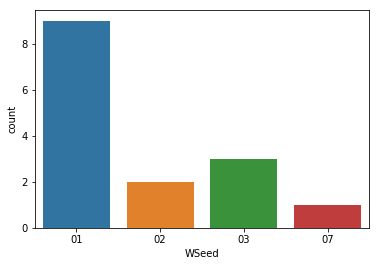

In [26]:
sns.countplot(x = "WSeed", data = champs)

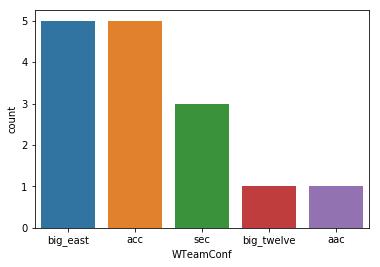

In [27]:
sns.countplot(x = "WTeamConf", data = champs)

In [28]:
ncaaLosers = ncaa[['DayNum', 'Season', 'LScore', 'LTeamID', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF']]
ncaaLosers['OppScore'] = ncaa['WScore'] 
ncaaWinners = ncaa[['DayNum', 'Season', 'WScore', 'WTeamID', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF']]
ncaaWinners['OppScore'] = ncaa['LScore']

for name in ncaaLosers.columns :
    ncaaLosers  = ncaaLosers.rename(columns={name:name.replace("L", "")})

for name in ncaaWinners.columns :
    ncaaWinners  = ncaaWinners.rename(columns={name:name.replace("W", "")})

ncaaWinners.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,DayNum,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,134,2003,92,1421,32,69,11,29,17,26,14,30,17,12,5,3,22,84
1,136,2003,80,1112,31,66,7,23,11,14,11,36,22,16,10,7,8,51
2,136,2003,84,1113,31,59,6,14,16,22,10,27,18,9,7,4,19,71
3,136,2003,79,1141,29,53,3,7,18,25,11,20,15,18,13,1,19,73
4,136,2003,76,1143,27,64,7,20,15,23,18,20,17,13,8,2,14,74


In [29]:
ncaaLosers.head()

,DayNum,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore
0,134,2003,84,1411,29,67,12,31,14,31,17,28,16,15,5,0,22,92
1,136,2003,51,1436,20,64,4,16,7,7,8,26,12,17,10,3,15,80
2,136,2003,71,1272,25,69,7,28,14,21,20,22,11,12,2,5,18,84
3,136,2003,73,1166,27,60,7,17,12,17,14,17,20,21,6,6,21,79
4,136,2003,74,1301,25,56,9,21,15,20,10,26,16,14,5,8,19,76


In [30]:
ncaaAll = ncaaWinners.append(ncaaLosers, ignore_index = True)
ncaaAll = pd.merge(ncaaAll, teamConf, on = ['Season', 'TeamID'])
ncaaAll = ncaaAll[ncaaAll["DayNum"] != 134]
ncaaAll = ncaaAll[ncaaAll["DayNum"] != 135]

ncaaAll.to_hdf("AllNcaaTourneyGames.h5", key = "df", mode = "w")

ncaaAll.head()

,DayNum,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore,ConfAbbrev,Seed
1,137,2003,61,1421,23,62,5,21,10,12,13,16,5,11,9,3,16,82,big_south,16
2,136,2003,80,1112,31,66,7,23,11,14,11,36,22,16,10,7,8,51,pac_ten,01
3,138,2003,96,1112,34,74,7,24,21,29,18,29,18,9,7,4,20,95,pac_ten,01
4,143,2003,88,1112,36,76,7,14,9,11,14,30,19,10,12,5,17,71,pac_ten,01
5,145,2003,75,1112,23,55,10,22,19,23,11,26,16,19,8,2,17,78,pac_ten,01


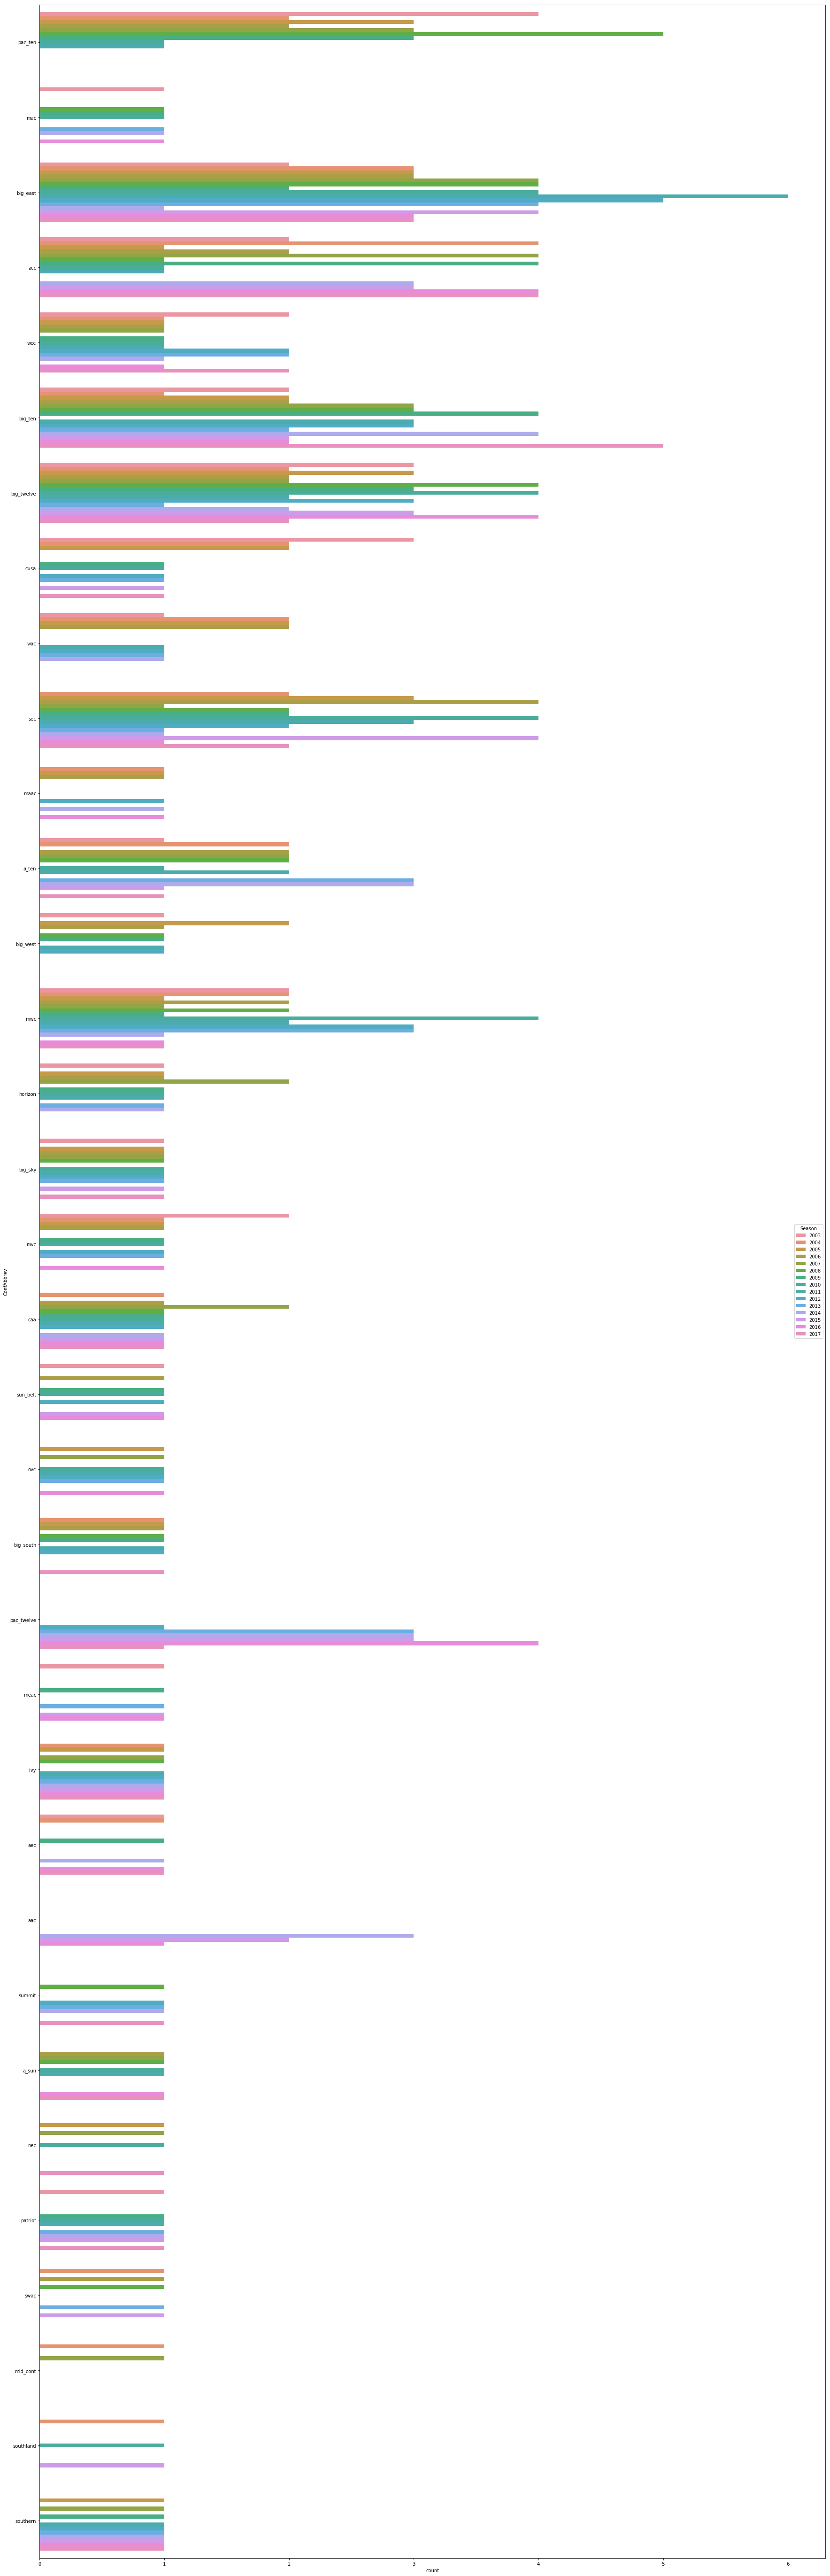

In [31]:
firstRound = pd.DataFrame(ncaaAll[ncaaAll.DayNum == 136])
firstRound.append(ncaaAll[ncaaAll.DayNum == 137], ignore_index = True)

firstRound.to_hdf("FirstRound.h5", key = "df", mode = "w")

plt.figure(figsize=(30, 100))
sns.countplot(y = 'ConfAbbrev', hue = 'Season', data = firstRound)

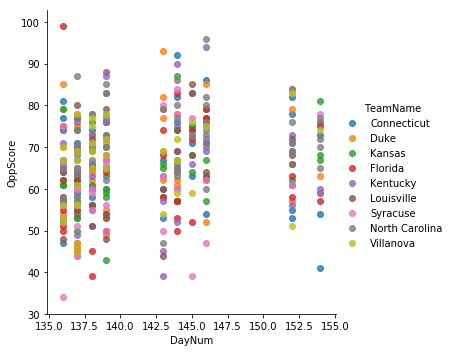

In [32]:
champ = ncaaAll[ncaaAll['TeamID'].isin(champs['WTeamID'])]

champ = pd.merge(champ, teams, on = 'TeamID')

champ.to_hdf("AllChampGames.h5", key = "df", mode = "w")

sns.lmplot(x = 'DayNum', y = 'OppScore', data = champ, hue = 'TeamName', fit_reg=False)

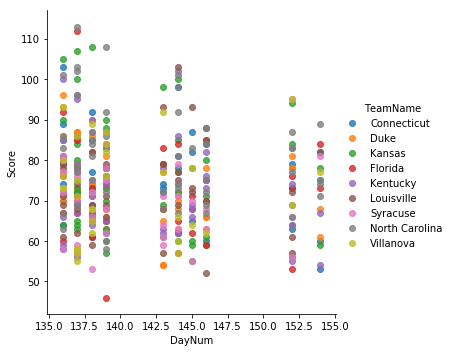

In [33]:
sns.lmplot(x = 'DayNum', y = 'Score', data = champ, hue = 'TeamName', fit_reg=False)

In [34]:
champ.head()

,DayNum,Season,Score,TeamID,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppScore,ConfAbbrev,Seed,TeamName,FirstD1Season,LastD1Season
0,136,2003,58,1163,17,52,4,14,20,27,12,29,8,14,3,8,16,53,big_east,05,Connecticut,1985,2018
1,138,2003,85,1163,31,68,6,10,17,21,17,26,12,9,4,1,13,74,big_east,05,Connecticut,1985,2018
2,144,2003,78,1163,30,71,4,13,14,25,14,27,13,11,7,8,21,82,big_east,05,Connecticut,1985,2018
3,136,2004,70,1163,26,52,6,14,12,23,11,31,14,13,6,3,8,53,big_east,02,Connecticut,1985,2018
4,138,2004,72,1163,26,60,5,16,15,23,13,31,15,5,5,5,15,55,big_east,02,Connecticut,1985,2018


In [35]:
champMean = champ.groupby('DayNum', as_index = False).mean()
champMean.to_hdf("ChampMean.h5", key = "df", mode = "w")

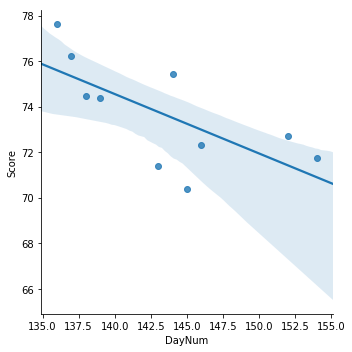

In [36]:
sns.lmplot(x = 'DayNum', y = 'Score', data = champMean)

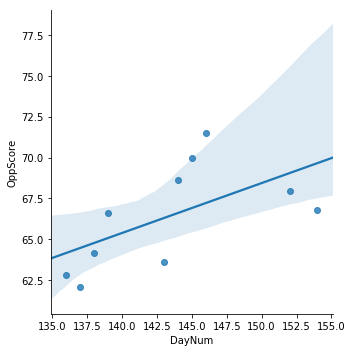

In [37]:
sns.lmplot(x = 'DayNum', y = 'OppScore', data = champMean)

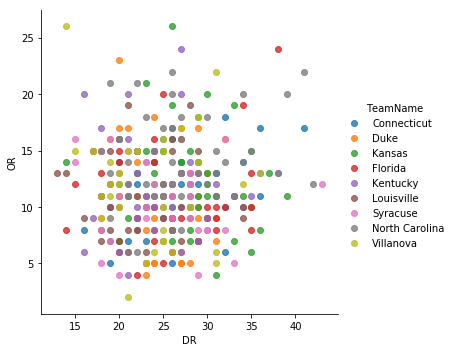

In [38]:
sns.lmplot(x = "DR", y = "OR", data = champ, fit_reg = False, hue = "TeamName")

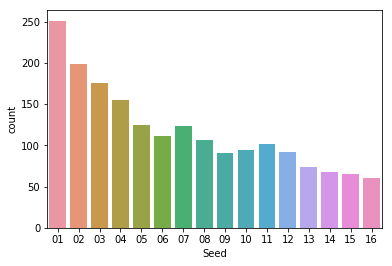

In [72]:
sns.countplot(x = "Seed", data = ncaaAll)

In [59]:
d = {'Seed': [0] *16}
champ_seeds = pd.DataFrame(d)
for i in range(0,16):
    champ_seeds.at[i, "Seed"] = i + 1
champ_seeds.head()

,Seed
0,1
1,2
2,3
3,4
4,5


In [71]:
champs['WSeed'].value_counts()

01    9
03    3
02    2
07    1
Name: WSeed, dtype: int64

In [74]:
ncaaAll['Seed'].value_counts()

01    251
02    198
03    176
04    155
05    124
07    123
06    111
08    106
11    102
10     94
12     92
09     91
13     74
14     68
15     65
16     60
Name: Seed, dtype: int64